In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
            discriminant_analysis, random_projection)
import random
from sklearn.preprocessing import normalize

              fid           mjd          ra       dec  magpsf_corr  \
oid                                                                  
ZTF18abefyya    2  58647.293681  274.347583 -7.689340    16.893037   
ZTF18abefyya    2  58575.459016  274.347481 -7.689254    17.355343   
ZTF18abefyya    2  58608.481921  274.347531 -7.689337    17.325110   
ZTF18abefyya    2  58607.356933  274.347498 -7.689360    17.328151   
ZTF18abefyya    2  58605.439329  274.347495 -7.689260    17.296300   

              sigmapsf_corr  
oid                          
ZTF18abefyya       0.024026  
ZTF18abefyya       0.034980  
ZTF18abefyya       0.038761  
ZTF18abefyya       0.039293  
ZTF18abefyya       0.036019  
             classALeRCE          ra        dec     period     source  \
oid                                                                     
ZTF18aakyuls         RRL  275.710304  36.051157   0.550747  CRTSnorth   
ZTF18abnznco         RRL  359.935451  17.656745  0.2710382     ASASSN   
ZTF18aa

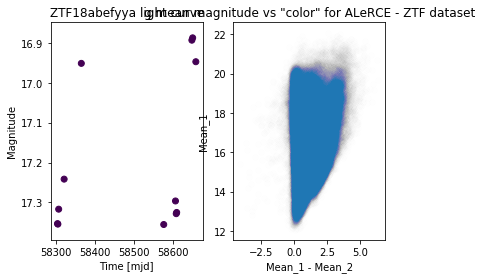

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


detections = pd.read_pickle(r'C:\Users\aleja\Desktop\p8ia\data_representativity\detections_664k.pkl')
features = pd.read_pickle(r'C:\Users\aleja\Desktop\p8ia\data_representativity\features_664k.pkl')
labels = pd.read_pickle(r'C:\Users\aleja\Desktop\p8ia\data_representativity\labels.pkl')

print(detections.head())
print(labels.head())

# How are the classes distributed?
print(labels[['classALeRCE', 'ra']].groupby('classALeRCE').count())

# Plot an object
first_object_oid = detections.index.values[0]#20760278
first_object_detections = detections.loc[first_object_oid]

print(f'Object {first_object_oid} has {len(first_object_detections)} detections')

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(
    first_object_detections.mjd,
    first_object_detections.magpsf_corr,
    c=first_object_detections.fid)

# In astronomy we plot the magnitude axis inverted (higher magnitude, dimmer objects)
plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(f'{first_object_oid} light curve')

# Let's do a simple scatter of two features
means = features[['Mean_1', 'Mean_2']].copy()
means.dropna(inplace=True)

plt.subplot(1, 2, 2)
plt.scatter(
    means.values[:, 0] - means.values[:, 1],
    means.values[:, 0],
    alpha=0.005
)
plt.ylabel('Mean_1')
plt.xlabel('Mean_1 - Mean_2')
plt.title('g mean magnitude vs "color" for ALeRCE - ZTF dataset')
plt.show()

In [3]:
DFclas=features.loc[labels.index]
DFclas=DFclas.dropna()
a=[]
for i in range(len(DFclas.index)):
    a.append(labels.loc[DFclas.index[i]][0])

DFclas2=DFclas
DFclas['clase']=a

RRL1000=DFclas['clase']=='RRL'
dfRRL=DFclas[RRL1000]
AGNI=DFclas['clase']=='AGN-I'
dfAGNI=DFclas[AGNI]
Blazar=DFclas['clase']=='Blazar'
dfBlazar=DFclas[Blazar]
CVNova=DFclas['clase']=='CV/Nova'
dfCVNova=DFclas[CVNova]
EBC=DFclas['clase']=='EBC'
dfEBC=DFclas[EBC]
EBSDD=DFclas['clase']=='EBSD/D'
dfEBSDD=DFclas[EBSDD]
LPV=DFclas['clase']=='LPV'
dfLPV=DFclas[LPV]
PeriodicOther=DFclas['clase']=='Periodic-Other'
dfPO=DFclas[PeriodicOther]
SNIa=DFclas['clase']=='SNIa'
dfSNIa=DFclas[SNIa]
Ceph=DFclas['clase']=='Ceph'
dfCeph=DFclas[Ceph]
DSCT=DFclas['clase']=='DSCT'
dfDSCT=DFclas[DSCT]
SNII=DFclas['clase']=='SNII'
dfSNII=DFclas[SNII]
SNIa=DFclas['clase']=='SNIa'
dfSNIa=DFclas[SNIa]

DFequal2=pd.concat([dfRRL[0:100],dfAGNI[0:100],dfBlazar[0:100],dfCVNova[0:100],dfEBC[0:100],dfEBSDD[0:100],dfLPV[0:100],dfPO[0:100],dfCeph[0:100],dfDSCT[0:100],dfSNII[0:100],dfSNIa[0:100]])
DFequal2.head()

,n_samples_1,Amplitude_1,AndersonDarling_1,Autocor_length_1,Beyond1Std_1,Con_1,Eta_e_1,Gskew_1,MaxSlope_1,Mean_1,...,ExcessVar_2,GP_DRW_sigma_2,GP_DRW_tau_2,SF_ML_amplitude_2,SF_ML_gamma_2,IAR_phi_2,LinearTrend_2,gal_b,gal_l,clase
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aakyuls,36.0,0.548401,0.980684,1.0,0.361111,0.0,1.270494,-0.228940,0.138083,17.068348,...,0.000251,0.072333,0.383776,0.404268,-6.619229e-03,0.996894,0.000338,20.971334,63.714680,RRL
ZTF18abnznco,28.0,0.204916,1.000000,1.0,0.392857,0.0,0.024958,-0.090507,0.140619,13.972252,...,0.000066,0.012926,0.297749,0.169156,-9.205407e-09,0.991869,-0.000340,-43.493407,105.847646,RRL
ZTF18aaadcnp,39.0,0.327207,1.000000,1.0,0.461538,0.0,0.653078,-0.135736,0.110238,15.186460,...,0.000097,0.020471,5.087895,0.266094,1.037024e-01,0.236068,0.000048,68.819694,158.479874,RRL
ZTF18aaactjb,60.0,0.349150,1.000000,1.0,0.416667,0.0,0.008650,-0.241208,60.593587,15.686243,...,0.000141,0.035444,0.189598,0.245191,-2.250942e-02,0.994975,-0.000137,39.860309,169.920868,RRL
ZTF18abrntoc,18.0,0.245114,0.999979,1.0,0.444444,0.0,2.131320,-0.216678,0.137048,15.511325,...,0.000096,0.022306,0.188424,0.229629,5.390245e-02,0.998081,-0.000506,-27.591426,30.874000,RRL


In [4]:
import random 
S1=DFclas['clase']=='SLSN'
S2=DFclas['clase']=='SNII'
S3=DFclas['clase']=='SNIIb'
S4=DFclas['clase']=='SNIIn'
S5=DFclas['clase']=='SNIa'
S6=DFclas['clase']=='SNIbc'

#Hay que añadir CV/nova??

dfS1=DFclas[S1]
dfS2=DFclas[S2]
dfS3=DFclas[S3]
dfS4=DFclas[S4]
dfS5=DFclas[S5]
dfS6=DFclas[S6]

SN=pd.concat([dfS1,dfS2,dfS3,dfS4,dfS5,dfS6])
SN['clase']='SN'
#SN
n=500
aleatorios = [random.randint(1,512) for _ in range(n)]

SN=SN.dropna()
dfSN=SN.iloc[aleatorios]
#dfSN


In [5]:
AGNI=DFclas['clase']=='AGN-I'
dfAGNI=DFclas[AGNI]

Blazar=DFclas['clase']=='Blazar'
dfBlazar=DFclas[Blazar]

CVNova=DFclas['clase']=='CV/Nova'
dfCVNova=DFclas[CVNova]

Ceph=DFclas['clase']=='Ceph' #menos de 500
dfCeph=DFclas[Ceph]

DSCT=DFclas['clase']=='DSCT' #menos de 500
dfDSCT=DFclas[DSCT]

EBC=DFclas['clase']=='EBC'
dfEBC=DFclas[EBC]

EBSDD=DFclas['clase']=='EBSD/D'
dfEBSDD=DFclas[EBSDD]

LPV=DFclas['clase']=='LPV'
dfLPV=DFclas[LPV]

PeriodicOther=DFclas['clase']=='Periodic-Other'
dfPO=DFclas[PeriodicOther]

RRL1000=DFclas['clase']=='RRL'
dfRRL=DFclas[RRL1000] 

#SNIa=DFclas['clase']=='SNIa'  #menos de 500 
#dfSNIa=DFclas[SNIa]


# Estos son los dos conjuntos finales


DF5=pd.concat([dfRRL[0:500],dfAGNI[0:500],dfBlazar[0:500],dfCVNova[0:500],dfEBC[0:500],dfEBSDD[0:500],dfLPV[0:500],dfPO[0:500],dfSN[0:500]])

DF1=pd.concat([dfAGNI[0:100],dfBlazar[0:100],dfCVNova[0:100],dfEBC[0:100],dfEBSDD[0:100],dfLPV[0:100],dfPO[0:100],dfRRL[0:100],
               dfCeph[0:100],dfDSCT[0:100],dfSN[0:100]])


In [6]:

n=1199
aleatorios = [random.randint(0,256983) for _ in range(n)]

dfsinetiq = features.drop(labels.index)
dfsinetiq=dfsinetiq.dropna()
df=dfsinetiq.iloc[aleatorios]
df['clase']='sin-clase'
DFalldata=pd.concat([DF1,df])  # Toda la data

dff=DFalldata.iloc[:,0:96]
data_norm=(dff-dff.min())/(dff.max()-dff.min())
data_norm2=data_norm
data_norm['clase']=DFalldata['clase']


B:\Anaconda\envs\hola\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
#muestra el conjunto de datos sin los target
X = data_norm.drop(['clase'],axis='columns')
#muestra el vector de los target de DFclas
Y=data_norm.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, stratify=Y)

classifier = RandomForestClassifier(n_estimators=40,max_depth=30)
classifier.fit(X_train, Y_train)

feature_importances = classifier.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = data_norm.columns.values

In [9]:
suma=0
indice=0
algo=np.sort(feature_importances)[::-1]
for i in range(len(algo)):
    if suma<=0.8:
        suma = suma+algo[i]
        indice=i
print(indice)
print(suma)

59
0.8016882470091852


In [10]:
from parametric_tSNE import Parametric_tSNE

In [11]:
data_norm=data_norm[data_norm.columns.values[importance_order[0:59]]]
high_dims = data_norm.shape[1]
num_outputs = 2
perplexity = 100
ptSNE = Parametric_tSNE(high_dims, num_outputs, perplexity)
ptSNE.fit(data_norm,verbose=2)
output_res = ptSNE.transform(data_norm)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2019-12-27 21:35:00.060412: Pretraining 4 layers
Train on 2299 samples
Epoch 1/10
2299/2299 - 1s - loss: 0.0503
Epoch 2/10
2299/2299 - 0s - loss: 0.0295
Epoch 3/10
2299/2299 - 0s - loss: 0.0272
Epoch 4/10
2299/2299 - 0s - loss: 0.0253
Epoch 5/10
2299/2299 - 0s - loss: 0.0239
Epoch 6/10
2299/2299 - 0s - loss: 0.0224
Epoch 7/10
2299/2299 - 0s - loss: 0.0214
Epoch 8/10
2299/2299 - 0s - loss: 0.0201
Epoch 9/10
2299/2299 - 0s - loss: 0.0194
Epoch 10/10
2299/2299 - 0s - loss: 0.0182
Train on 2299 samples
Epoch 1/10
2299/2299 - 1s - loss: 0.0725
Epoch 2/10
2299/2299 - 0s - loss: 0.0384
Epoch 3/10
2299/2299 - 0s - loss: 0.0297
Epoch 4/10
2299/2299 - 0s - loss: 0.0232
Epoch 5/10
2299/2299 - 0s - loss: 0.0190
Epoch 6/10
2299/2299 - 0s - loss: 0.0166
Epoch 7/10
2299/2299 - 0s - loss: 0.0152
Epoch 8/10
2299/2299 - 0s - loss: 0.0144
Epoch 9/10
2299/2299 - 0s - loss: 0.0138
Epoch 10/10
2299/2299 - 0s - loss: 0.0129
Trai

Text(0.5, 1.0, 't-SNE')

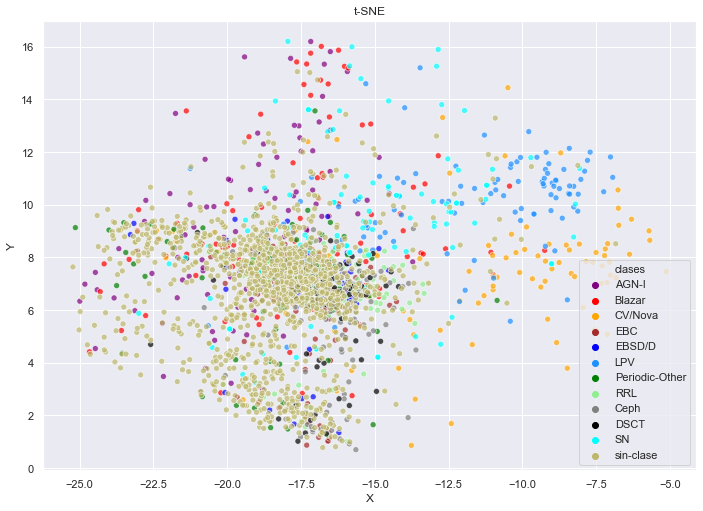

In [12]:
y=DFalldata.iloc[:,96]
tsne_df = pd.DataFrame({'X':output_res[:,0],
                        'Y':output_res[:,1],
                        'clases':y})



import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','gray','black','aqua','darkkhaki',],#,'pink',],
              legend='full',
              data=tsne_df,alpha=0.7);
plt.title('t-SNE')

In [60]:
#Aqui se crean los dataset finales

AGNI=DFclas['clase']=='AGN-I'
dfAGNI=DFclas[AGNI]

Blazar=DFclas['clase']=='Blazar'
dfBlazar=DFclas[Blazar]

CVNova=DFclas['clase']=='CV/Nova'
dfCVNova=DFclas[CVNova]

Ceph=DFclas['clase']=='Ceph' #menos de 500
dfCeph=DFclas[Ceph]

DSCT=DFclas['clase']=='DSCT' #menos de 500
dfDSCT=DFclas[DSCT]

EBC=DFclas['clase']=='EBC'
dfEBC=DFclas[EBC]

EBSDD=DFclas['clase']=='EBSD/D'
dfEBSDD=DFclas[EBSDD]

LPV=DFclas['clase']=='LPV'
dfLPV=DFclas[LPV]

PeriodicOther=DFclas['clase']=='Periodic-Other'
dfPO=DFclas[PeriodicOther]

RRL1000=DFclas['clase']=='RRL'
dfRRL=DFclas[RRL1000] 

#SNIa=DFclas['clase']=='SNIa'  #menos de 500 
#dfSNIa=DFclas[SNIa]


# Estos son los dos conjuntos finales


DFtodo=pd.concat([dfRRL,dfAGNI,dfBlazar,dfCVNova,dfEBC,dfEBSDD,dfLPV,dfPO,dfCeph,dfDSCT,SN])
agni=DFclas['clase']=='AGN-II'
dfagni=DFclas[agni]

DFalldata=pd.concat([DFtodo,dfagni])
DFalldata=DFalldata.dropna()

In [61]:
#muestra el conjunto de datos sin los target
#X = DF5.drop(['clase'],axis='columns')
X = DFalldata.drop(['clase'],axis='columns')
#muestra el vector de los target de DFclas
#Y=DF5.iloc[:,-1]
Y=DFalldata.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, stratify=Y)

classifier = RandomForestClassifier(n_estimators=40,max_depth=30)
classifier.fit(X_train, Y_train)

feature_importances = classifier.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = DFalldata.columns.values


In [62]:
suma=0
indice=0
algo=np.sort(feature_importances)[::-1]
for i in range(len(algo)):
    if suma<=0.8:
        suma = suma+algo[i]
        indice=i
print(indice)
print(suma)

51
0.8049495279248173


In [63]:
NuevaData1 = DFalldata[DFalldata.columns.values[importance_order[0:51]]]
dff=NuevaData1

dnorm=(dff-dff.min())/(dff.max()-dff.min())

In [69]:
#data_norm3=data_norm2[data_norm2.columns.values[importance_order[0:59]]]
high_dims = dnorm.shape[1]
num_outputs = 2
perplexity = 500
ptSNE = Parametric_tSNE(high_dims, num_outputs, perplexity)
ptSNE.fit(dnorm)
output_res = ptSNE.transform(dnorm)

Text(0.5, 1.0, 't-SNE')

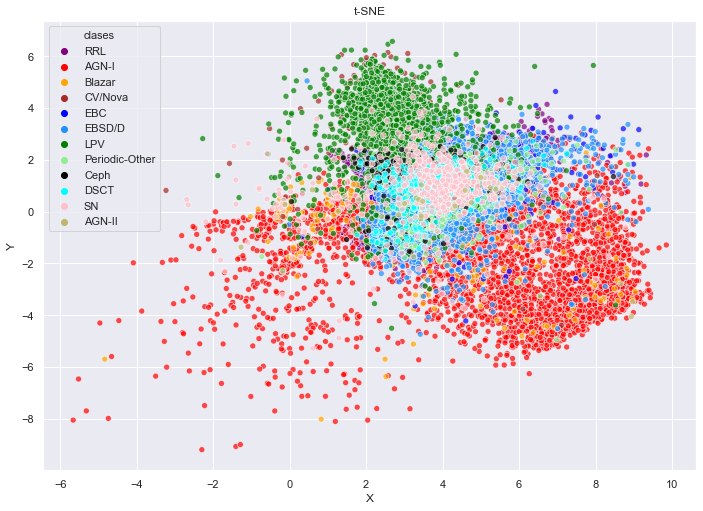

In [68]:
y=DFalldata.iloc[:,96]
tsne_df = pd.DataFrame({'X':output_res[:,0],
                        'Y':output_res[:,1],
                        'clases':y})



import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','black','aqua','pink','darkkhaki',],
              legend='full',
              data=tsne_df,alpha=0.7);
plt.title('t-SNE')

In [ ]:
#data_norm3=data_norm2[data_norm2.columns.values[importance_order[0:59]]]
high_dims = dnorm.shape[1]
num_outputs = 2
perplexity =40
ptSNE = Parametric_tSNE(high_dims, num_outputs, perplexity)
ptSNE.fit(dnorm)
output_res = ptSNE.transform(dnorm)

Text(0.5, 1.0, 't-SNE')

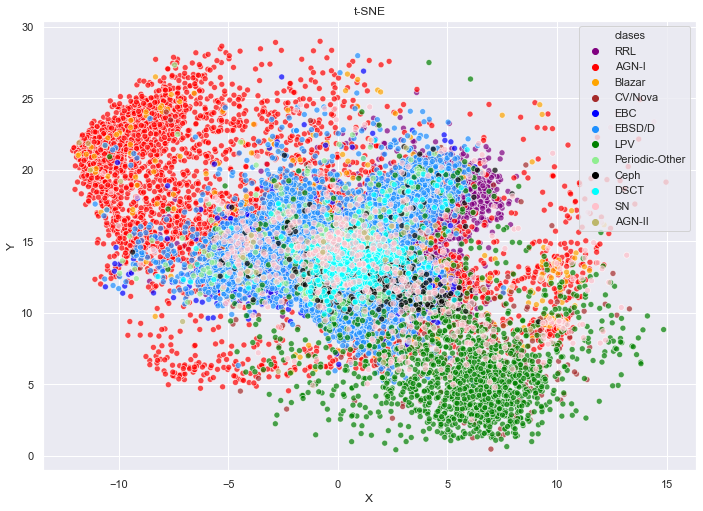

In [66]:
#perplexity 40
y=DFalldata.iloc[:,96]
tsne_df = pd.DataFrame({'X':output_res[:,0],
                        'Y':output_res[:,1],
                        'clases':y})



import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="X", y="Y",
              hue="clases",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','black','aqua','pink','darkkhaki',],
              legend='full',
              data=tsne_df,alpha=0.7);
plt.title('t-SNE')